# Simulating Predator and Prey Relationship

Without a predator, rabbits will reproduce until they reach the carrying capacity of the land. When coyotes show up, they will eat the rabbits and reproduce until they can't find enough rabbits. We will explore the fluctuations in the two populations over time.

# Using Lotka-Volterra Model

## Part 1: Rabbits without predators

According to [Mother Earth News](https://www.motherearthnews.com/homesteading-and-livestock/rabbits-on-pasture-intensive-grazing-with-bunnies-zbcz1504), a rabbit eats six square feet of pasture per day. Let's assume that our rabbits live in a five acre clearing in a forest: 217,800 square feet/6 square feet = 36,300 rabbit-days worth of food. For simplicity, let's assume the grass grows back in two months. Thus, the carrying capacity of five acres is 36,300/60 = 605 rabbits.

Female rabbits reproduce about six to seven times per year. They have six to ten children in a litter.  According to [Wikipedia](https://en.wikipedia.org/wiki/Rabbit), a wild rabbit reaches sexual maturity when it is about six months old and typically lives one to two years. For simplicity, let's assume that in the presence of unlimited food, a rabbit lives forever, is immediately sexually mature, and has 1.5 children every month.

For our purposes, then, let $x_t$ be the number of rabbits in our five acre clearing on month $t$.
$$
\begin{equation*}
  R_t = R_{t-1} + 1.5\frac{605 - R_{t-1}}{605} R_{t-1}
\end{equation*}
$$

The formula could be put into general form
$$
\begin{equation*}
  R_t = R_{t-1} + growth_{R} \times \big( \frac{capacity_{R} - R_{t-1}}{capacity_{R}} \big) R_{t-1}
\end{equation*}
$$

By doing this, we allow users to interact with growth rate and the capacity value visualize different interaction 


In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

FloatText(value=1.0, description='Initial population', style=DescriptionStyle(description_width='initial'))

FloatText(value=605.0, description='Capacity')

FloatText(value=2.0, description='Growth rate')

Button(description='Plot Graph', style=ButtonStyle())

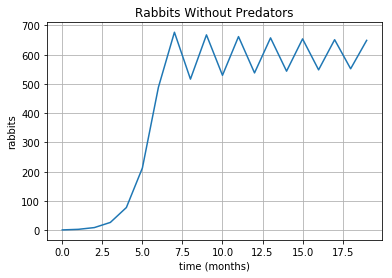

In [9]:
%matplotlib inline
style = {'description_width': 'initial'}
capacity_R = widgets.FloatText(description="Capacity", value=605)
growth_rate_R = widgets.FloatText(description="Growth rate", value=1.5)
initial_R = widgets.FloatText(description="Initial population",style=style, value=1)
button_R = widgets.Button(description="Plot Graph")
display(initial_R, capacity_R, growth_rate_R, button_R)

def plot_graph_r(b):
    clear_output()
    display(initial_R, capacity_R, growth_rate_R, button_R)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t = np.arange(0, 20, 1)
    s = np.zeros(t.shape)
    R = initial_R.value
    for i in range(t.shape[0]):
        s[i] = R
        #print(s[i])
        nextvalue = growth_rate_R.value * (capacity_R.value - R)/(capacity_R.value) * R
        #print('nextvalue: ', nextvalue)
        R = R + nextvalue
    
  
    ax.plot(t, s)
    ax.set(xlabel='time (months)', ylabel='rabbits',
       title='Rabbits Without Predators')
    ax.grid()

button_R.on_click(plot_graph_r)

## Part 2: Coyotes without preys
According to [Huntwise](https://www.besthuntingtimes.com/blog/2020/2/3/why-you-should-coyote-hunt-how-to-get-started), coyotes need to consume about 2-3 pounds of food per day. Their diet is 90 percent mammalian. The perfect adult cottontail rabbits weigh 2.6 pounds on average. Thus, we assume the coyote eats one rabbit per day. 

For coyotes, the breeding season is in February and March. According to [Wikipedia](https://en.wikipedia.org/wiki/Coyote#Social_and_reproductive_behaviors), females have a gestation period of 63 days, with an average litter size of 6, though the number fluctuates depending on coyote population density and the abundance of food. By fall, the pups are old enough to hunt for themselves.

In the absence of rabbits, the number of coyotes will drop, as their food supply is scarce.
The formula could be put into general form:

$$
\begin{align*}
  C_t & \sim (1 - death_{C}) \times C_{t-1}\\
  &= C_{t-1} - death_{C} \times C_{t-1}
\end{align*}
$$



FloatText(value=200.0, description='Initial Population', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.5, description='Death rate')

Button(description='Plot Graph', style=ButtonStyle())

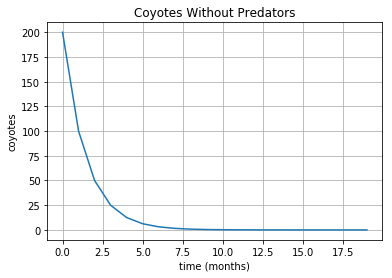

In [20]:
%matplotlib inline
style = {'description_width': 'initial'}
initial_C=widgets.FloatText(description="Initial Population",style=style,value=200.0)
declining_rate_C=widgets.FloatText(description="Death rate",value=0.5)
button_C=widgets.Button(description="Plot Graph")
display(initial_C, declining_rate_C, button_C)

def plot_graph_c(b):
    clear_output()
    display(initial_C, declining_rate_C, button_C)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t1 = np.arange(0, 20, 1)
    s1 = np.zeros(t1.shape)
    C = initial_C.value
    for i in range(t1.shape[0]):
        s1[i] = C
        C = (1 - declining_rate_C.value)*C
        
    ax.plot(t1, s1)
    ax.set(xlabel='time (months)', ylabel='coyotes',
       title='Coyotes Without Predators')
    ax.grid()

button_C.on_click(plot_graph_c)


## Part 3: Interaction Between Coyotes and Rabbit
With the simple interaction from the first two parts, now we can combine both interaction and come out with simple interaction.
$$
\begin{align*}
  R_t &= R_{t-1} + growth_{R} \times \big( \frac{capacity_{R} - R_{t-1}}{capacity_{R}} \big) R_{t-1} - death_{R}(C_{t-1})\times R_{t-1}\\\\
  C_t &= C_{t-1} - death_{C} \times C_{t-1} + growth_{C}(R_{t-1}) \times C_{t-1}
\end{align*}
$$

In equations above, death rate of rabbit is a function parameterized by the amount of coyote. Similarly, the growth rate of coyotes is a function parameterized by the amount of the rabbit.

The death rate of the rabbit should be $0$ if there are no coyotes, while it should approach $1$ if there are many coyotes. One of the formula fulfilling this characteristics is hyperbolic function.

$$
\begin{equation}
death_R(C) = 1 - \frac{1}{xC + 1}
\end{equation}
$$

where $x$ determines how quickly $death_R$ increases as the number of coyotes ($C$) increases. Similarly, the growth rate of the coyotes should be $0$ if there are no rabbits, while it should approach infinity if there are many rabbits. One of the formula fulfilling this characteristics is a linear function.

$$
\begin{equation}
growth_C(R) = yC
\end{equation}
$$

where $y$ determines how quickly $growth_C$ increases as number of rabbit ($R$) increases.

Putting all together, the final equtions are

$$
\begin{align*}
  R_t &= R_{t-1} + growth_{R} \times \big( \frac{capacity_{R} - R_{t-1}}{capacity_{R}} \big) R_{t-1} - \big( 1 - \frac{1}{xC_{t-1} + 1} \big)\times R_{t-1}\\\\
  C_t &= C_{t-1} - death_{C} \times C_{t-1} + yR_{t-1}C_{t-1}
\end{align*}
$$



FloatText(value=1.0, description='Initial Rabbit')

FloatText(value=1.0, description='Initial Coyote')

FloatText(value=5.0, description='capacity_R')

FloatText(value=1.0, description='growth_R')

FloatText(value=1.0, description='death_C')

FloatText(value=1.0, description='x')

FloatText(value=1.0, description='y')

Button(description='Plot Graph', style=ButtonStyle())

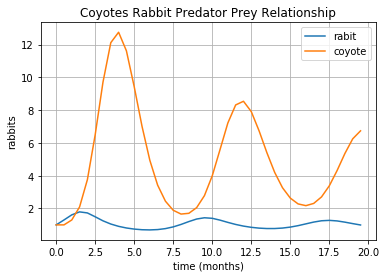

In [33]:
#### %matplotlib inline
initial_rabbit = widgets.FloatText(description="Initial Rabbit", value=1)
initial_coyote = widgets.FloatText(description="Initial Coyote", value=1)
capacity = widgets.FloatText(description="capacity_R", value=5)
growth_rate = widgets.FloatText(description="growth_R", value=1)
death_rate = widgets.FloatText(description="death_C", value=1)
x = widgets.FloatText(description="x", value=1)
y = widgets.FloatText(description="y", value=1)
button = widgets.Button(description="Plot Graph")
display(initial_rabbit, initial_coyote, capacity, growth_rate, death_rate, x, y, button)
def plot_graph(b):
    clear_output()
    display(initial_rabbit, initial_coyote, capacity, growth_rate, death_rate, x, y, button)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t = np.arange(0, 20, 0.5)
    s = np.zeros(t.shape)
    p = np.zeros(t.shape)
    R = initial_rabbit.value
    C = initial_coyote.value
    for i in range(t.shape[0]):
        s[i] = R
        p[i] = C
        R = R + growth_rate.value * (capacity.value - R)/(capacity.value) * R - (1 - 1/(x.value*C + 1))*R
        C = C - death_rate.value * C  + y.value*s[i]*C
        
    ax.plot(t, s, label="rabit")
    ax.plot(t, p, label="coyote")
    ax.set(xlabel='time (months)', ylabel='rabbits',
       title='Coyotes Rabbit Predator Prey Relationship')
    ax.grid()
    ax.legend()

button.on_click(plot_graph)

## Using ABM simulation
In ABMs of ecological and evolutionary dynamics, prey naturally grow but get eaten by predators, while the predators grow if they get prey, but naturally die off if they can't find any food. 
In our ABM simulation model, we will randomly choosing an agent to update the system's state in an asynchronous manner.
### Design the data structure to store the attributes of the the prey and predators
The information about about agent type must be represented in the data structure, also in order to simulate the interactions in a spacel, the information about the agents spatial location is also needed. In the code, we use r_init and c_init to represent the initial population of rabbits and coyotes. The for loop iterates r_init + c_init times, and in the first r_init iteration, the prey agents are generated, while the predator agents are generated for the rest.

### The rules for how prey and predators behave on their own:
If a prey agent meets a predator agent, it dies with some probability because of predation. We will implement death as the removal of the prey from the preys agents list.
If a predator agent can't find any prey agents nearby, it dies with some probability because of the lack of food. Otherwise, it will reproduce at a certain reproduction rate. 
According to [Purely Facts](http://purelyfacts.com/question/12/which-is-faster-a-coyote-or-a-rabbit?DDA=28&DDB=98),  the top speed is roughly 64 kph for coyote, and 4 kph for rabbit, so let's assume coyotes are 15 times faster than rabbit. Furthermore, to ensure our simulation model can naturally handle situations where the size of the agent population changes rapidly, and guarantees that each agent is updated once, on average, in each unit time length, we defined a update_one_unit_time() function to address the issue. We make the unit length of time passes by in each asynchronous updating proportional to the size of the agent populationat the time of updating. This way, the progress of time will be steady in the simulation, even if the number of agents changes over time.

### Static Single Step 

IntText(value=400, description='Initial_rabbit_count', style=DescriptionStyle(description_width='initial'))

IntText(value=12, description='Initial_coyote_count', style=DescriptionStyle(description_width='initial'))

IntText(value=605, description='Rabbit_capacity', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.1, description='Rabbit_reproduction', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.07, description='coyote_death_rate', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.03, description='coyote_birth_rate', style=DescriptionStyle(description_width='initial'))

Button(description='Init', style=ButtonStyle())

Button(description='Step', style=ButtonStyle())

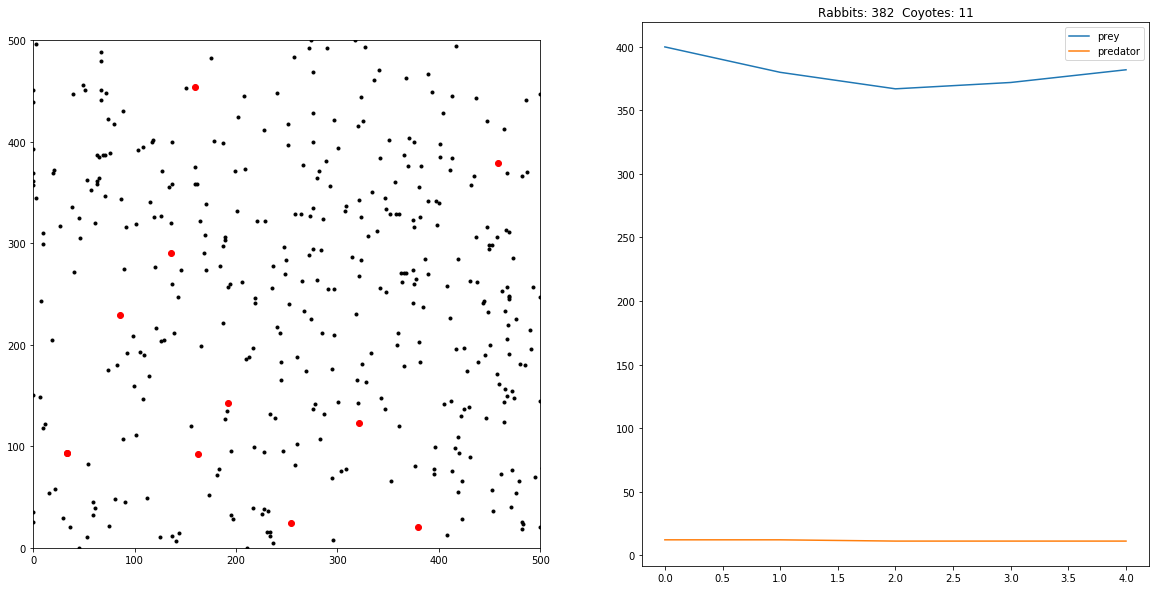

In [43]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
%matplotlib inline
# matplotlib.use('TkAgg')
from pylab import *
import copy as cp



r_init = 0 # Initial rabbit population 
c_init = 0 #Initial coyotes population
nr = 0 # Capacity of rabbits
mr = 20.0 # Magnitude of movement of rabbits in feet per day
rr = 0 # Reproduction rate of rabbits (per day)
dc = 0 # Death rate of coyotes when there is no rabbit (per day)
rc = 0 # Reproduction rate of coyotes (per day)
cd = 20.0 # Radius for collision detection in feet
mc = mr * 2 # Magnitude of movement of coyotes in feet per day
cc = 3 # How many unburned rabbits a coyote can contain
ic = 0.04 # Likelihood that an immigrant coyote will show up on any day
ir = 0.1 #Likelihood that an immigrant rabbit will show up on any day
cdsq = cd**2

width = 500 # Width of pasture in feet
height = 500 # Height of pasture in feet

class Rabbit:
    pass

class Coyote:
    pass

def initialize(a):
    global r_init, c_init, nr, mr, rr, dc, rc, mc, cc, ic, ir, cdsq
   
    # Give default values
    r_init = initial_rabbit_count.value # Initial rabbit population 
    c_init = initial_coyote_count.value #Initial coyotes population
    nr = rabbit_capacity.value # Capacity of rabbits
    mr = 20.0 # Magnitude of movement of rabbits in feet per day
    rr = rabbit_reproduction.value # Reproduction rate of rabbits (per day)
    dc = coyote_death_rate.value # Death rate of coyotes when there is no rabbit (per day)
    rc = coyote_birth_rate.value # Reproduction rate of coyotes (per day)
    cd = 20.0 # Radius for collision detection in feet
    mc = mr * 2 # Magnitude of movement of coyotes in feet per day
    cc = 3 # How many unburned rabbits a coyote can contain
    ic = 0.04 # Likelihood that an immigrant coyote will show up on any day
    ir = 0.1 #Likelihood that an immigrant rabbit will show up on any day
    cdsq = cd**2
    
    '''
    Created for CSE/ECE 6730 final project
    '''
    global rabbits, coyotes, rdata, cdata
    rabbits = []
    coyotes = []
    rdata = []
    cdata = []
    for i in range(r_init):
        ag = Rabbit()
        ag.birthday = 0
        ag.x = width * random()
        ag.y = height * random()
        rabbits.append(ag)
        
    for i in range(c_init):
        ag = Coyote()
        ag.unburned_rabbits = 0 #Born hungry
        ag.birthday = 0
        ag.x = width * random()
        ag.y = height * random()
        coyotes.append(ag)
        
    observe()
        
def update_one_unit_time(b):
    global rabbits, coyotes
    
    new_coyotes = []
    new_rabbits = []

    # Find the weighted center of mass for coyotes
    # Coyotes who see no rabbits will head in this direction
    center_x = width / 2.0
    center_y = height / 2.0
    for coyote in coyotes:
        sx = 0.0
        sy = 0.0
        n = 0
        sx += coyote.x * coyote.unburned_rabbits
        sy += coyote.y * coyote.unburned_rabbits
        n += coyote.unburned_rabbits
        if n > 0:
            center_x = sx / n
            center_y = sy / n

    # Immigrant coyote?
    if random() < ic:
            ag = Coyote()
            ag.unburned_rabbits = 1
            ag.birthday = 0 # FIXME
            ag.x = width * random()
            ag.y = height * random()
            new_coyotes.append(ag) 
            
    # Immigrant rabbit?
    if random() < ir:
            ag = Rabbit()
            ag.birthday = 0 # FIXME
            ag.x = width * random()
            ag.y = height * random()
            new_rabbits.append(ag)            
        
    # Move rabbits randomly
    for ag in rabbits:    
        ag.x += uniform(-mr, mr)
        ag.y += uniform(-mr, mr)
        ag.x = width if ag.x > width else 0 if ag.x < 0 else ag.x
        ag.y = height if ag.y > height else 0 if ag.y < 0 else ag.y
 
    # Move coyotes to a nearby rabbit
    for coyote in coyotes:
        reachable_rabbits = [nb for nb in rabbits if (coyote.x - nb.x)**2 +(coyote.y - nb.y)**2 < mc**2]
        reachable_count = len(reachable_rabbits)
        
        # No reachable rabbits? Move toward fat coyotes
        if reachable_count == 0:
            coyote.x = 0.9 * coyote.x + 0.1 * center_x
            coyote.y = 0.9 * coyote.y + 0.1 * center_y
        else:
            if reachable_count ==  1:
                target = reachable_rabbits[0]
            if reachable_count > 1:
                target = reachable_rabbits[randint(0, reachable_count - 1)]

            coyote.x = target.x
            coyote.y = target.y
  
    # Feed the coyotes
    for coyote in coyotes:

        # Burn one rabbit
        coyote.unburned_rabbits = coyote.unburned_rabbits - 1
            
        # Find the rabbits that are nearby
        near_rabbits = [nb for nb in rabbits if (coyote.x - nb.x)**2 +(coyote.y - nb.y)**2 < cdsq]
        
        # How many rabbits will the coyote eat?
        to_eat = min(cc - coyote.unburned_rabbits, len(near_rabbits))
        
        # Eat them
        while to_eat > 0:
            rabbit_to_eat = near_rabbits[0]
            rabbits.remove(rabbit_to_eat)
            del near_rabbits[0]
            coyote.unburned_rabbits += 1
            to_eat = to_eat - 1
            

    # Kill hungry coyotes
    i = 0
    while i < len(coyotes):
        coyote = coyotes[i]
        
        # Empty belly for eight days? Coyote dies
        if coyote.unburned_rabbits < -8:
            del coyotes[i]
            continue
        
        # Less? Coyote has a chance
        if coyote.unburned_rabbits <= 0:
            if random() < dc:
                del coyotes[i]
            else:
                i += 1
        else:
            i += 1
    
    # Reproduce fed coyotes
    for coyote in coyotes:
        
        if coyote.unburned_rabbits > 0 and random() < rc:
            ag = Coyote()
            ag.unburned_rabbits = 0 #Born hungry
            ag.birthday = 0 # FIXME
            ag.x = coyote.x + 10.0 * random()
            ag.y = coyote.y + 10.0 * random()
            new_coyotes.append(ag)            
    
    # Reproduce uneated rabbits
    growth_rate = 1 - len(rabbits)/nr;
    for rabbit in rabbits:
          if random() < rr * growth_rate:
            ag = Rabbit()
            ag.birthday = 0 # FIXME
            ag.x = rabbit.x + 10.0 * random()
            ag.y = rabbit.y + 10.0 * random()
            new_rabbits.append(ag)            
    
    # Update arrays
    coyotes.extend(new_coyotes)
    rabbits.extend(new_rabbits)
    observe()

def observe():
    global agents, rdata, cdata, width, height
    #cla()
    clear_output()
    display(initial_rabbit_count, initial_coyote_count, rabbit_capacity, rabbit_reproduction, coyote_death_rate, coyote_birth_rate,button_init, button_step)
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(121)
    #cla()

    rdata.append(len(rabbits))
    if len(rabbits) > 0:
        x = [ag.x for ag in rabbits]
        y = [ag.y for ag in rabbits]
        ax.plot(x,y,'k.')

    cdata.append(len(coyotes))
    if len(coyotes) > 0:
        x = [ag.x for ag in coyotes]
        y = [ag.y for ag in coyotes]
        ax.plot(x,y,'ro')
    ax.axis('image')
    ax.axis([0,width,0,height])
    summary = "Rabbits: {}  Coyotes: {}".format(len(rabbits), len(coyotes))
    
    ax = fig.add_subplot(122)
    #cla()
    ax.plot(rdata, label ='prey')
    ax.plot(cdata, label = 'predator')
    ax.set_title(summary)
    #print("hello")
    legend()


style = {'description_width': 'initial'}
initial_rabbit_count = widgets.IntText(description="Initial_rabbit_count", value=400, style=style)
initial_coyote_count = widgets.IntText(description="Initial_coyote_count", value=12, style=style)
rabbit_capacity = widgets.IntText(description="Rabbit_capacity",style=style, value=605)
rabbit_reproduction = widgets.FloatText(description="Rabbit_reproduction",style=style, value=0.1)
coyote_death_rate = widgets.FloatText(description="coyote_death_rate",style=style, value=0.07)
coyote_birth_rate = widgets.FloatText(description="coyote_birth_rate",style=style, value=0.03)
button_step = widgets.Button(description="Step")
button_init = widgets.Button(description="Init")
display(initial_rabbit_count, initial_coyote_count, rabbit_capacity, rabbit_reproduction, coyote_death_rate, coyote_birth_rate,button_init, button_step)

button_init.on_click(initialize)
button_step.on_click(update_one_unit_time)


### GUI Interaction

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib
matplotlib.use('TkAgg')
from pylab import *
import copy as cp
import pycxsimulator

# Supress warnings
# import sys
# oldstderr = sys.stderr
# sys.stderr = open('/dev/null', 'w')


# Give default values
r_init = 400 # Initial rabbit population 
c_init = 12 #Initial coyotes population
nr = 605 # Capacity of rabbits
mr = 20.0 # Magnitude of movement of rabbits in feet per day
rr = 0.1 # Reproduction rate of rabbits (per day)
dc = 0.07 # Death rate of coyotes when there is no rabbit (per day)
rc = 0.03 # Reproduction rate of coyotes (per day)
cd = 20.0 # Radius for collision detection in feet
mc = mr * 2 # Magnitude of movement of coyotes in feet per day
cc = 3 # How many unburned rabbits a coyote can contain
ic = 0.04 # Likelihood that an immigrant coyote will show up on any day
ir = 0.1 #Likelihood that an immigrant rabbit will show up on any day
cdsq = cd**2

width = 500 # Width of pasture in feet
height = 500 # Height of pasture in feet

class Rabbit:
    pass

class Coyote:
    pass

def initialize():
    '''
    Created for CSE/ECE 6730 final project
    '''
    global rabbits, coyotes, rdata, cdata
    rabbits = []
    coyotes = []
    rdata = []
    cdata = []
    for i in range(r_init):
        ag = Rabbit()
        ag.birthday = 0
        ag.x = width * random()
        ag.y = height * random()
        rabbits.append(ag)
        
    for i in range(c_init):
        ag = Coyote()
        ag.unburned_rabbits = 0 #Born hungry
        ag.birthday = 0
        ag.x = width * random()
        ag.y = height * random()
        coyotes.append(ag)

        
def update_one_unit_time():
    global rabbits, coyotes
    
    new_coyotes = []
    new_rabbits = []

    # Find the weighted center of mass for coyotes
    # Coyotes who see no rabbits will head in this direction
    center_x = width / 2.0
    center_y = height / 2.0
    for coyote in coyotes:
        sx = 0.0
        sy = 0.0
        n = 0
        sx += coyote.x * coyote.unburned_rabbits
        sy += coyote.y * coyote.unburned_rabbits
        n += coyote.unburned_rabbits
        if n > 0:
            center_x = sx / n
            center_y = sy / n

    # Immigrant coyote?
    if random() < ic:
            ag = Coyote()
            ag.unburned_rabbits = 1
            ag.birthday = 0 # FIXME
            ag.x = width * random()
            ag.y = height * random()
            new_coyotes.append(ag) 
            
    # Immigrant rabbit?
    if random() < ir:
            ag = Rabbit()
            ag.birthday = 0 # FIXME
            ag.x = width * random()
            ag.y = height * random()
            new_rabbits.append(ag)            
        
    # Move rabbits randomly
    for ag in rabbits:    
        ag.x += uniform(-mr, mr)
        ag.y += uniform(-mr, mr)
        ag.x = width if ag.x > width else 0 if ag.x < 0 else ag.x
        ag.y = height if ag.y > height else 0 if ag.y < 0 else ag.y
 
    # Move coyotes to a nearby rabbit
    for coyote in coyotes:
        reachable_rabbits = [nb for nb in rabbits if (coyote.x - nb.x)**2 +(coyote.y - nb.y)**2 < mc**2]
        reachable_count = len(reachable_rabbits)
        
        # No reachable rabbits? Move toward fat coyotes
        if reachable_count == 0:
            coyote.x = 0.9 * coyote.x + 0.1 * center_x
            coyote.y = 0.9 * coyote.y + 0.1 * center_y
        else:
            if reachable_count ==  1:
                target = reachable_rabbits[0]
            if reachable_count > 1:
                target = reachable_rabbits[randint(0, reachable_count - 1)]

            coyote.x = target.x
            coyote.y = target.y
  
    # Feed the coyotes
    for coyote in coyotes:

        # Burn one rabbit
        coyote.unburned_rabbits = coyote.unburned_rabbits - 1
            
        # Find the rabbits that are nearby
        near_rabbits = [nb for nb in rabbits if (coyote.x - nb.x)**2 +(coyote.y - nb.y)**2 < cdsq]
        
        # How many rabbits will the coyote eat?
        to_eat = min(cc - coyote.unburned_rabbits, len(near_rabbits))
        
        # Eat them
        while to_eat > 0:
            rabbit_to_eat = near_rabbits[0]
            rabbits.remove(rabbit_to_eat)
            del near_rabbits[0]
            coyote.unburned_rabbits += 1
            to_eat = to_eat - 1
            

    # Kill hungry coyotes
    i = 0
    while i < len(coyotes):
        coyote = coyotes[i]
        
        # Empty belly for eight days? Coyote dies
        if coyote.unburned_rabbits < -8:
            del coyotes[i]
            continue
        
        # Less? Coyote has a chance
        if coyote.unburned_rabbits <= 0:
            if random() < dc:
                del coyotes[i]
            else:
                i += 1
        else:
            i += 1
    
    # Reproduce fed coyotes
    for coyote in coyotes:
        
        if coyote.unburned_rabbits > 0 and random() < rc:
            ag = Coyote()
            ag.unburned_rabbits = 0 #Born hungry
            ag.birthday = 0 # FIXME
            ag.x = coyote.x + 10.0 * random()
            ag.y = coyote.y + 10.0 * random()
            new_coyotes.append(ag)            
    
    # Reproduce uneated rabbits
    growth_rate = 1 - len(rabbits)/nr;
    for rabbit in rabbits:
          if random() < rr * growth_rate:
            ag = Rabbit()
            ag.birthday = 0 # FIXME
            ag.x = rabbit.x + 10.0 * random()
            ag.y = rabbit.y + 10.0 * random()
            new_rabbits.append(ag)            
    
    # Update arrays
    coyotes.extend(new_coyotes)
    rabbits.extend(new_rabbits)


def observe():
    global agents, rdata, cdata, width, height
    cla()
    
    subplot(1, 2 , 1)
    cla()

    rdata.append(len(rabbits))
    if len(rabbits) > 0:
        x = [ag.x for ag in rabbits]
        y = [ag.y for ag in rabbits]
        plot(x,y,'k.')

    cdata.append(len(coyotes))
    if len(coyotes) > 0:
        x = [ag.x for ag in coyotes]
        y = [ag.y for ag in coyotes]
        plot(x,y,'ro')
    axis('image')
    axis([0,width,0,height])
    summary = "Rabbits: {}  Coyotes: {}".format(len(rabbits), len(coyotes))
    
    p = subplot(1, 2, 2)
    cla()
    plot(rdata, label ='prey')
    plot(cdata, label = 'predator')
    p.set_title(summary)

    legend()
    
# Parameter setters
def initial_rabbit_count (val = r_init):
    '''
    Initial rabbit population
    '''
    global r_init
    r_init = int(val) # or int(val), str(val), etc.
    return val

def initial_coyote_count (val = c_init):
    '''
    Initial coyote population
    '''
    global c_init
    c_init = int(val) # or int(val), str(val), etc.
    return val

def rabbit_capacity (val = nr):
    '''
    Max rabbit population
    '''
    global nr
    nr = int(val) # or int(val), str(val), etc.
    return val


def rabbit_reproduction (val = rr ):
    '''
    Probability that a rabbit will give birth any particular day
    '''
    global r
    rr = float(val) # or int(val), str(val), etc.
    return val

def coyote_death_rate (val = dc ):
    '''
    Probability that a coyote will die on a day it is not near any rabbits
    '''
    global dc
    dc = float(val) # or int(val), str(val), etc.
    return val

def coyote_birth_rate (val = rc):
    '''
    Probability that a coyote will give birth on any particular day
    '''
    global rc
    rc = float(val) # or int(val), str(val), etc.
    return val


                
pycxsimulator.GUI(parameterSetters = [initial_rabbit_count, initial_coyote_count, rabbit_capacity, rabbit_reproduction, coyote_death_rate, coyote_birth_rate]).start(func = [initialize, observe, update_one_unit_time])



IntText(value=400, description='Initial_rabbit_count')

IntText(value=12, description='Initial_coyote_count')

IntText(value=605, description='Rabbit_capacity', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.1, description='Rabbit_reproduction', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.07, description='coyote_death_rate', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.03, description='coyote_birth_rate', style=DescriptionStyle(description_width='initial'))

Button(description='Init', style=ButtonStyle())

Button(description='Step', style=ButtonStyle())

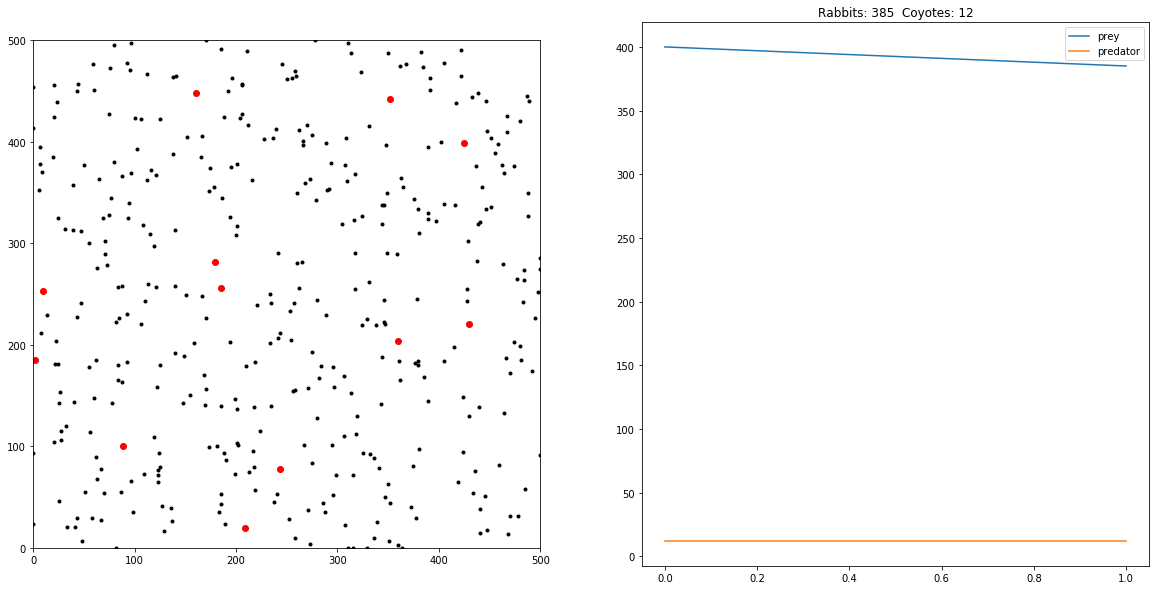